p_bend_radius = 0.2021197079306207
p_bend_angle = 90
p_drift_post_aperture = 0.001647845131336711
p_drift_pre_bend = 0.08264476762309475
p_drift_post_bend = 0.07893060501596277
p_drift_pre_hodoscope = [fit]
p_m5a_length = 0.06981600194372625
p_m5a_quad = 0.5
p_m5b_length = 0.06928842409139782
p_m5b_quad = 0.1179451296465932
p_shape_in_1 = -0.1249745550920304
p_shape_out_1 = -0.10147496294559

Magnification: -0.5877948509924193
Focus: -7.793628520325058e-10
Dispersion: 0.3777294113195158
Resolution: 0.0311225355176387


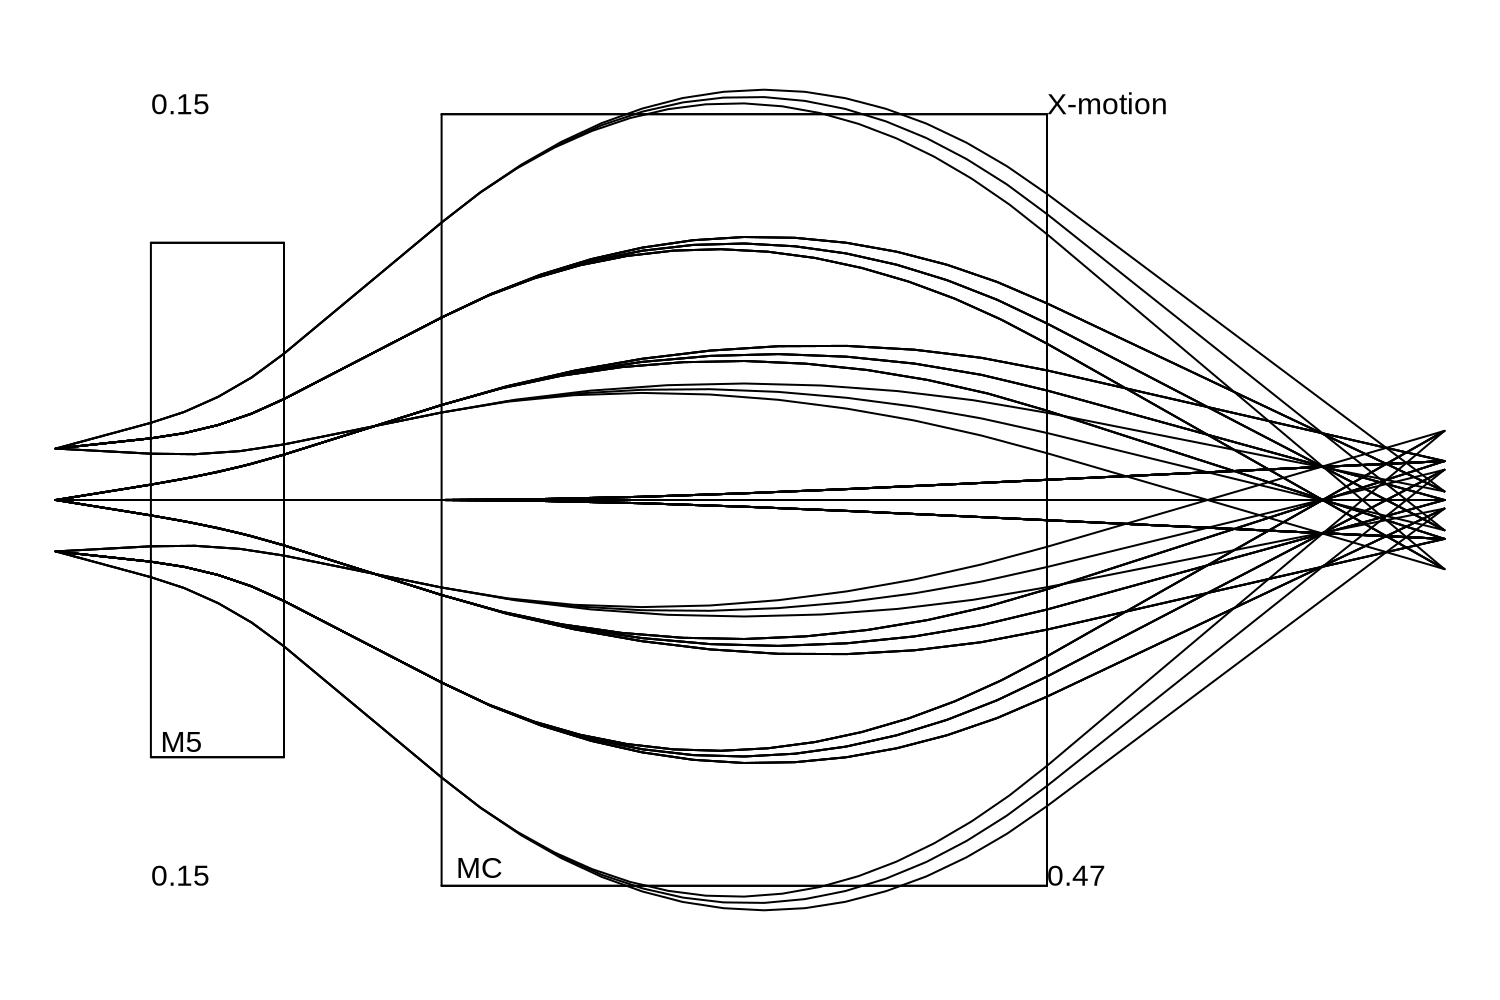

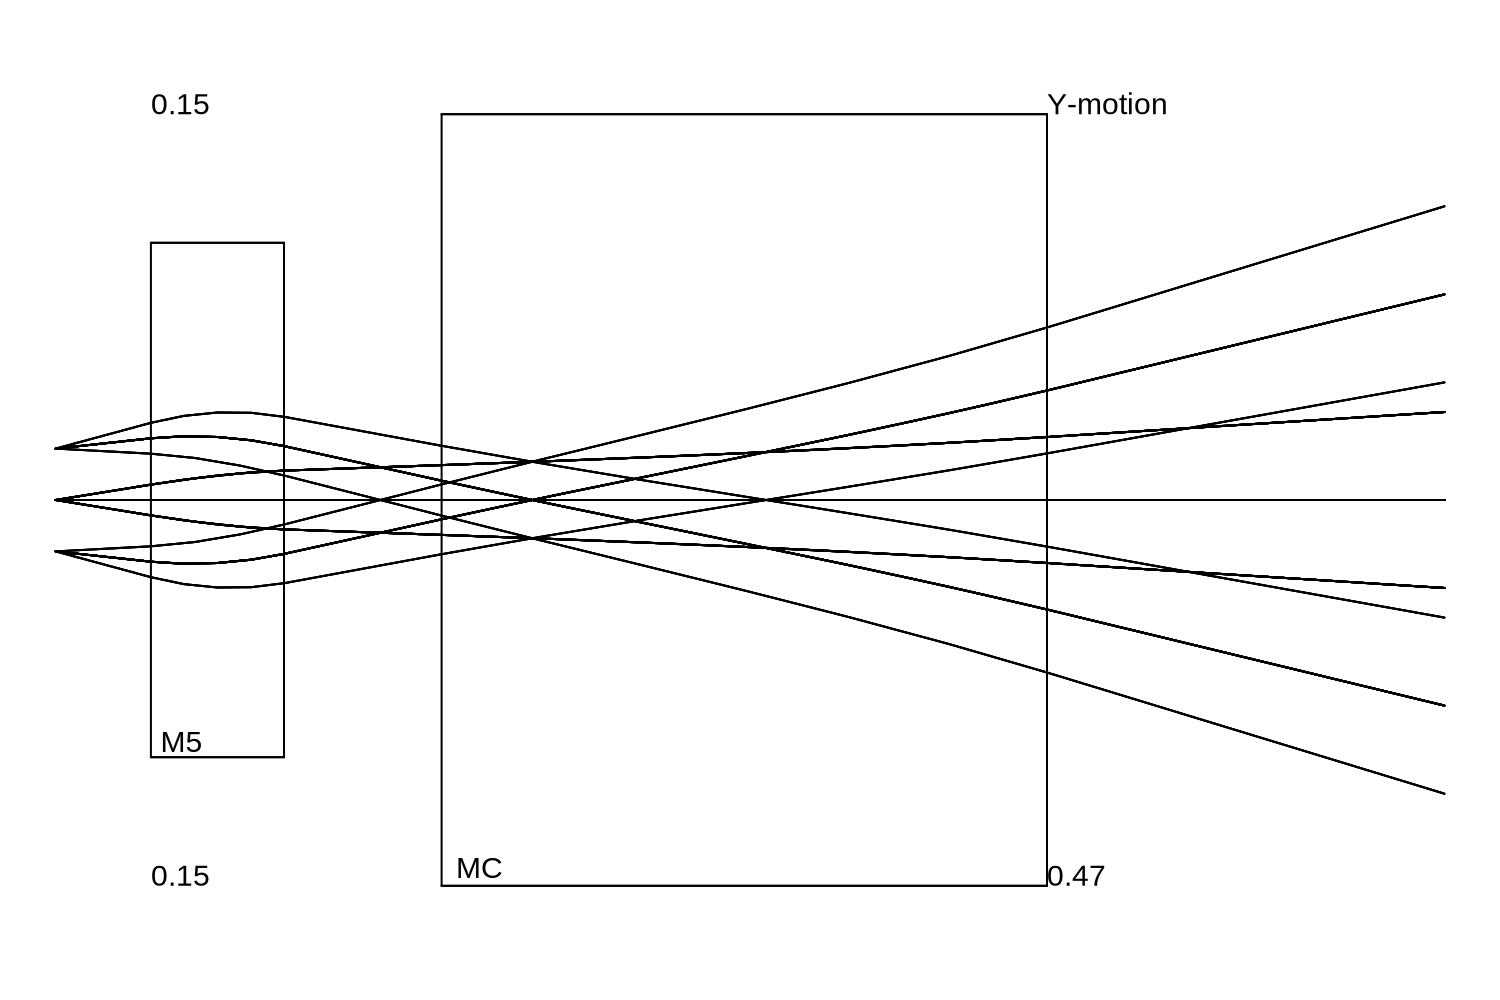

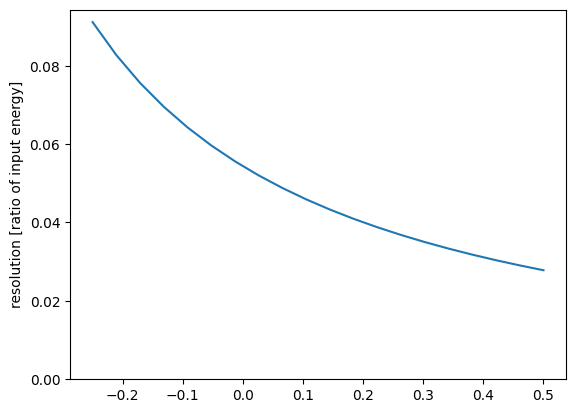

In [2]:
from mrs_ion_optics import gen_charictaristic_rays, MRSIonOptics
import mrs_ion_optics as K
from IPython.core.display import SVG, display_svg
import numpy as np
import matplotlib.pyplot as plt

R_FOIL = 0.015
L_DRIFT = 0.25
R_APERTURE = 0.01

sess = (
    MRSIonOptics()
    # .set_parameter(K.K_p_m5a_quad, 0.5)
    # .set_parameter(K.K_p_m5a_length, 0.05)
    # .set_parameter(K.K_p_drift_pre_bend, 0.05)
    # .set_parameter(K.K_p_drift_post_bend, 0.05)
    # .set_parameter(K.K_p_m5b_quad, -0.03)
    # .set_parameter(K.K_p_m5b_length, 0.2)
    .set_parameter(K.K_p_bend_angle, 90)
    .config_fit([K.K_p_drift_pre_hodoscope])
    .config_order(1)
    .config_vis_lab_coordinates(False)
    .config_outputs(["ME(1,1)","ME(1,2)","ME(1,6)"])
    .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3,energy=-0.02), color=3)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3,energy=0.02), color=2)
)

X = np.linspace(-0.25,0.5,20)
V = np.array([sess.set_parameter(K.K_p_m5a_quad,x).exec()[1] for x in X])
plt.plot(X, np.abs(2*R_APERTURE*V[:, 0] / V[:, 2]))
plt.ylim(bottom = 0)
plt.ylabel("resolution [ratio of input energy]")

sess.print_params()
print()

outputs, _ = sess.set_parameter(K.K_p_m5a_quad, 0.4).exec_fit()
print("Magnification:", outputs[0])
print("Focus:", outputs[1])
print("Dispersion:", outputs[2])
print("Resolution:", abs(2 * R_APERTURE * outputs[0] / outputs[2]))
for svg_data in sess.exec_svg():
    display_svg(SVG(data=svg_data))